In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from pylab import rcParams

In [143]:
pd.set_option('max_columns',110)
pd.set_option('max_rows',110)
pd.set_option('display.max_info_rows',110)
rcParams['figure.figsize'] = 20, 20

In [105]:
train = pd.read_csv("./train/train.csv",index_col="unique_id")

In [106]:
test = pd.read_csv("./test/test.csv",index_col="unique_id")

In [107]:
train.head()

,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,x_13,x_14,x_15,x_16,x_17,x_18,x_19,x_20,x_21,x_22,x_23,x_24,x_25,x_26,x_27,x_28,x_29,x_30,x_31,x_32,x_33,x_34,x_35,x_36,x_37,x_38,x_39,x_40,x_41,x_42,x_43,x_44,x_45,x_46,x_47,x_48,x_49,x_50,x_51,x_52,x_53,x_54,x_55,x_56,x_57,x_58,x_59,x_60,x_61,x_62,x_63,x_64,x_65,x_66,x_67,x_68,x_69,x_70,x_71,x_72,x_73,x_74,x_75,x_76,x_77,x_78,x_79,x_80,x_81,x_82,x_83,x_84,x_85,x_86,x_87,x_88,x_89,x_90,x_91,x_92,x_93,x_94,x_95,x_96,x_97,x_98,x_99,x_100,targets
unique_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,1,0,-101.25,0,1,0,0,0.977661,0,0.743264,5,1,0,0.001343,0,0,0,1.031724,0,0,0,5,1,1,0,0,0,22026.465795,0,0,0,1,0,0,0,0,10,0,2,0,0,0,0,0,0,0,0,123456,1,0,0,0,0,0,0,0,1,2017,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,-2017,0,0,0,0,0,0,13,0,10,0,1.0,0,0,0,2.374118,0,0.0,0,3.588515,6,1.968998,4
1,0,0,0,0,0,-101.25,0,0,0,0,1.149371,0,0.951311,0,0,0,-0.008308,0,0,0,1.844950,0,0,0,0,0,0,0,0,0,22026.465795,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123456,0,0,0,0,0,0,0,0,0,2017,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-2017,0,0,0,0,0,0,0,0,0,0,1.0,1,0,0,1.905289,0,0.0,3,0.726108,5,1.741416,5
2,0,0,0,0,0,-101.25,0,0,0,0,1.102710,0,-2.400838,3,0,1,0.008529,0,0,0,0.320508,0,0,0,3,0,0,0,0,0,22026.465795,0,0,0,0,2,1,0,0,2,0,0,1,1,0,0,0,0,0,0,123456,0,0,1,0,0,0,0,0,0,2017,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,-2017,0,0,0,0,0,0,1,0,0,0,1.0,0,3,0,-1.861978,3,0.0,1,1.946937,10,0.986247,9
3,0,0,0,0,0,-101.25,0,0,0,1,0.985333,0,2.848317,13,1,1,-0.007814,0,1,0,0.817401,1,0,0,5,0,0,0,0,0,22026.465795,0,1,0,0,0,0,0,0,7,0,0,0,1,0,0,0,3,0,0,123456,0,0,1,0,0,0,0,0,1,2017,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,-2017,0,0,0,0,0,0,1,2,2,0,1.0,0,1,0,5.944138,1,10.0,4,3.356318,7,0.645281,2
4,0,0,0,0,0,-101.25,0,0,0,0,1.099747,0,4.002406,0,0,0,0.007536,0,0,0,-0.960097,0,0,0,4,0,0,0,0,0,22026.465795,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,123456,0,0,0,0,0,0,0,0,0,2017,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,-2017,0,0,0,0,0,0,0,0,0,0,1.0,0,0,0,0.534246,0,10.0,0,0.728621,8,1.254002,2


In [108]:
train.x_6.value_counts()

-101.25    35291
-100.25      496
-99.25       110
-98.25        37
-96.25         8
-97.25         5
-95.25         1
-93.25         1
-91.25         1
Name: x_6, dtype: int64

In [109]:
test.x_6.value_counts()

-101.25    7220
-100.25     112
-99.25       26
-98.25        4
-97.25        1
-96.25        1
Name: x_6, dtype: int64

In [110]:
print(train.x_6.mean())
print(train.x_6.std())

-101.22465924895688
0.21911203946443275


In [111]:
train.x_11.value_counts()

2.882852         1
0.874944         1
1.021816         1
2.371232         1
1.061844         1
2.337196         1
1.002507         1
1.198775         1
1.008824         1
7.953409         1
1.137946         1
1.139303         1
1.039941         1
1.110298         1
1083.694068      1
0.997190         1
0.920889         1
0.940881         1
1.042408         1
7.961687         1
0.909731         1
1.100652         1
2.950908         1
1.161206         1
2.980050         1
1.054406         1
1.034819         1
1.114201         1
0.928235         1
1.065663         1
1.075578         1
0.737562         1
7.998363         1
1.084983         1
0.946922         1
0.927219         1
0.991762         1
0.954500         1
0.901991         1
1.012410         1
1.215275         1
1.022435         1
6.428248         1
440938.754502    1
2.474228         1
1.003804         1
1.072009         1
0.847846         1
9.039011         1
2.341874         1
0.920438         1
1.009656         1
2.565830    

In [112]:
test.x_11.value_counts()

1.036627e+00    1
9.798280e-01    1
3.216717e+03    1
9.107604e-01    1
9.049601e-01    1
1.043842e+00    1
9.169335e-01    1
9.427128e-01    1
8.276054e-01    1
1.014285e+00    1
9.328197e-01    1
1.172697e+00    1
8.580131e-01    1
8.388582e-01    1
1.029736e+00    1
9.068100e-01    1
1.033419e+00    1
9.475754e-01    1
9.494846e-01    1
1.012838e+00    1
8.682357e-01    1
1.140239e+00    1
7.781594e-01    1
8.764873e+00    1
8.483173e+03    1
1.008399e+00    1
1.046362e+00    1
9.885931e-01    1
1.071613e+00    1
7.400874e+00    1
9.781489e-01    1
9.780870e-01    1
7.856786e+00    1
1.048088e+00    1
3.092772e+00    1
1.145683e+00    1
1.742491e+04    1
1.002600e+00    1
1.179871e+00    1
9.013935e-01    1
3.058968e+00    1
1.052160e+00    1
9.506726e-01    1
9.480144e-01    1
8.708714e-01    1
1.183370e+00    1
9.777478e-01    1
1.072589e+00    1
9.978009e-01    1
1.126018e+00    1
9.635730e-01    1
1.043740e+00    1
1.177871e+00    1
9.622477e-01    1
9.403338e-01    1
          

In [113]:
train.x_100.value_counts()

0.618163    1
0.940981    1
0.570726    1
3.707695    1
3.082478    1
3.220284    1
0.463158    1
1.505499    1
0.184075    1
0.382945    1
0.573895    1
0.698157    1
0.915087    1
1.174420    1
0.962677    1
0.662682    1
8.138638    1
1.011098    1
3.465040    1
0.736025    1
1.005980    1
0.342785    1
0.226668    1
3.197388    1
0.846066    1
0.442154    1
0.453117    1
1.156446    1
1.015017    1
0.425963    1
0.403335    1
0.203363    1
0.222229    1
3.917054    1
0.253980    1
1.232630    1
0.673758    1
0.494197    1
2.151523    1
3.104235    1
0.591037    1
0.486530    1
4.360150    1
0.755852    1
0.570956    1
1.511250    1
0.362487    1
0.797012    1
1.261474    1
0.435581    1
0.248239    1
0.493609    1
2.593601    1
0.716944    1
1.980431    1
           ..
0.775051    1
0.599025    1
0.820970    1
1.664430    1
0.708585    1
0.682040    1
0.843682    1
5.649439    1
4.974528    1
0.665154    1
2.567120    1
2.016086    1
2.149438    1
2.918770    1
0.564608    1
1.1683

In [114]:
train.x_90.value_counts()

1.000000e+00    31135
2.718282e+00     2133
7.389056e+00      769
2.008554e+01      346
5.459815e+01      265
4.034288e+02      171
1.484132e+02      156
1.096633e+03      102
2.980958e+03       78
2.202647e+04       71
8.103084e+03       54
5.987414e+04       44
4.424134e+05       41
3.269017e+06       35
8.886111e+06       35
1.202604e+06       32
1.627548e+05       31
2.415495e+07       30
1.784823e+08       24
6.565997e+07       22
4.851652e+08       22
3.584913e+09       22
7.200490e+10       21
1.318816e+09       19
9.744803e+09       18
1.957296e+11       16
9.496119e+19       12
4.311232e+15       12
2.648912e+10       11
4.727839e+18       11
1.586013e+15       10
2.581313e+20        9
2.146436e+14        9
5.320482e+11        9
1.068647e+13        9
2.904885e+13        8
5.834617e+14        8
2.353853e+17        8
3.831008e+22        8
3.931334e+12        8
1.285160e+19        7
8.659340e+16        7
1.446257e+12        7
1.041376e+23        6
1.739275e+18        6
7.016736e+

In [115]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35950 entries, 0 to 35949
Columns: 101 entries, x_1 to targets
dtypes: float64(11), int64(90)
memory usage: 28.0 MB


In [116]:
c = train.dtypes

In [117]:
v = c.tolist()

In [118]:
feature_ind = []
count = 0

In [119]:
for i in v:
    if(i == "float64"):
        feature_ind.append(count)
    count = count+1

In [120]:
feature_ind

[5, 10, 12, 16, 20, 30, 89, 93, 95, 97, 99]

In [131]:
#change dataframe
for i in feature_ind:
    train.iloc[:,i] = train.iloc[:,i].astype(np.float)

In [132]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35950 entries, 0 to 35949
Columns: 101 entries, x_1 to targets
dtypes: float64(11), int64(90)
memory usage: 28.0 MB


In [135]:
from sklearn.ensemble import RandomForestClassifier

# Create a copy to work with
X = train.copy()

# Save and drop labels
y = train.targets
X = X.drop('targets', axis=1)
    
xg = XGBClassifier()
xg.fit(X,y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

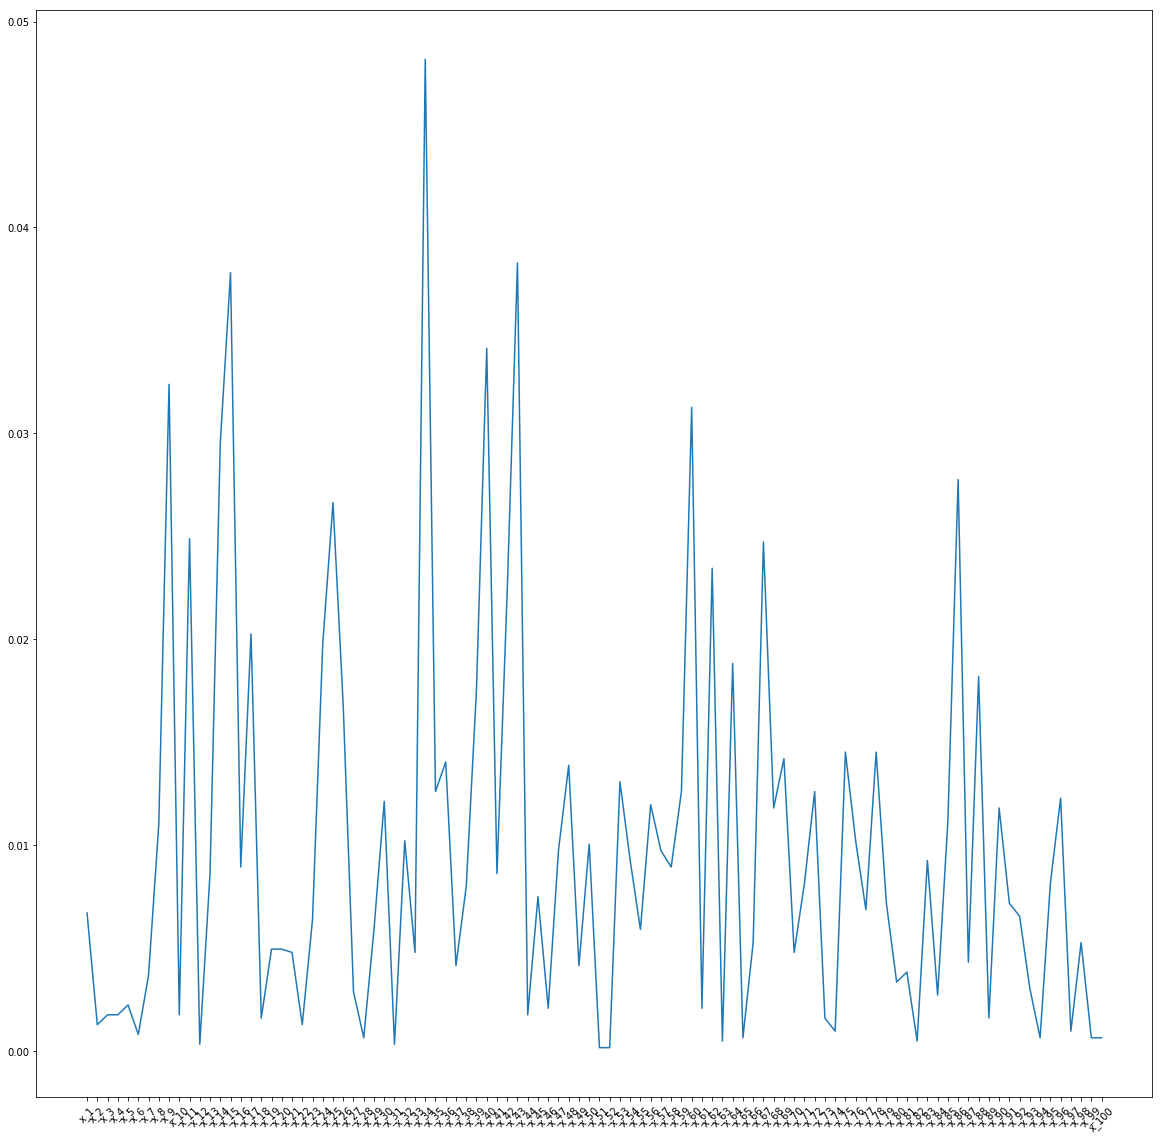

In [144]:
plt.plot(xg.feature_importances_)
plt.xticks(np.arange(X.shape[1]), X.columns.tolist(), rotation=45)
plt.show()